In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy as sp
from math import floor, ceil
from queue import PriorityQueue

In [2]:
def Uni01():
    return random.random()
def Poisson(lam):
    k = Uni01()
    f = 1
    for i in range(100):
        k -= np.exp(-lam)*lam**i/f
        f *= (i+1)
        if (k<0):return i
    return 100

(array([9.1050e+03, 1.4723e+04, 3.8852e+04, 1.5762e+04, 1.6436e+04,
        2.9380e+03, 1.9010e+03, 2.0100e+02, 7.4000e+01, 8.0000e+00]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

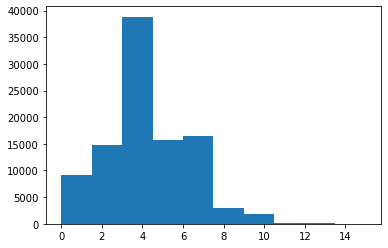

In [3]:
exitSamples = [Poisson(4) for _ in range(100000)]
plt.hist(exitSamples) 

In [4]:
def exp(mu):
    return -1/mu*np.log(Uni01())

(array([7.1337e+04, 2.0521e+04, 5.7250e+03, 1.7310e+03, 4.8400e+02,
        1.4000e+02, 3.9000e+01, 1.7000e+01, 4.0000e+00, 2.0000e+00]),
 array([3.41921388e-06, 1.25557989e+01, 2.51115943e+01, 3.76673898e+01,
        5.02231853e+01, 6.27789807e+01, 7.53347762e+01, 8.78905716e+01,
        1.00446367e+02, 1.13002163e+02, 1.25557958e+02]),
 <BarContainer object of 10 artists>)

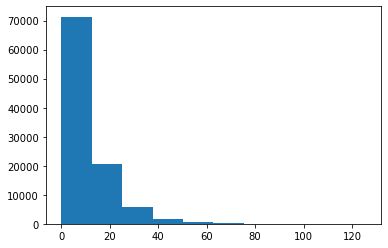

In [5]:
exitSamples = [exp(0.1) for _ in range(100000)]
plt.hist(exitSamples) 

In [77]:
class server_heap():
    # TODO: A Data structure which used to repensent a server in the quene
    # The value in the heap is the finish time of the task
    def __init__(self, heap_size, queue_size, mu, server_name):
        self.heap_top = 0
        self.heap = [0]*heap_size
        self.queue_top = 0
        self.max_heap = heap_size
        self.max_queue = queue_size
        self.mu = mu
        self.server_name = server_name
        
    @property
    def que_min(self):
        ans = 1e9
        for i in range(self.heap_top):
            ans = min(ans, self.heap[i])
        return ans,self.server_name
    
    def pop_min(self):
        ans,qwq = self.que_min
        for i in range(self.heap_top):
            if (self.heap[i] == ans):
                self.heap[i], self.heap[self.heap_top-1] =self.heap[self.heap_top-1], self.heap[i]
                self.heap_top-=1
                break
    
    def blocked(self):
        return self.queue_top >= self.max_queue
    
    def add_task(self, time):
        #print(self.server_name,time)
        if (self.blocked()):
            return "blocked!!!"
        else:
            self.queue_top+=1
        self.refresh(time)
        return "Successful added"
    
    def refresh(self, time):
        while (self.heap_top < self.max_heap and self.queue_top > 0):
            self.queue_top -= 1
            self.heap[self.heap_top] = time + exp(self.mu)
            # according to the problem, the excute time is a exp distribution
            self.heap_top += 1
        #print("heap",self.heap, self.heap_top)

    #TODO: A 4-stage DSE simulation,
            
class DSE1():
    def __init__(self, stat_begin = 50, stat_end = 100):
        self.begin_time = 0
        self.end_time = stat_end
        self.stat_begin = stat_begin
        self.time = 0
        self.len = 4
        self.q_size = [5,6,6,3]
        self.h_size = [1,1,1,1]
        self.mu = [2.9, 2.2, 2.2, 2.8]
        self.server_heap = [0]*4
        for i in range(self.len):
            self.server_heap[i] = server_heap(self.h_size[i], self.q_size[i], self.mu[i], i)
        self.lam = 2.1
        self.ans = 0
        
    def add_work(self):
        works = Poisson(self.lam)
        # according to the problem
        for i in range(works):
            self.server_heap[0].add_task(self.time)
        # TODO: works will come at time:0, 1, 2, 3....
        
    def next_event(self):
        ans = (1e9,-1)
        for i in range(self.len):
            if (i == 3 or not self.server_heap[i+1].blocked()):
                ans = min(ans, (self.server_heap[i].que_min))
        # print("qwq",ans, self.time)
        if (floor(self.time) < floor(ans[0])):
            # Warning: will error if use != instead of <
            # print(floor(self.time), floor(ans[0]))
            self.time = floor(self.time)+1
            self.add_work()
        else:
            self.time=ans[0]
            self.server_heap[ans[1]].pop_min()
            if (ans[1]==3):
                if (self.time>=50 and self.time<100):
                    self.ans += 1
            else:
                self.server_heap[ans[1]+1].add_task(self.time)
        for i in range(self.len):self.server_heap[i].refresh(self.time)
    def calc(self):
        self.add_work()
        while (self.time<self.end_time):
            self.next_event()
        return self.ans

(array([  9.,  57.,  90., 167., 209., 237., 138.,  64.,  23.,   6.]),
 array([ 77. ,  82.6,  88.2,  93.8,  99.4, 105. , 110.6, 116.2, 121.8,
        127.4, 133. ]),
 <BarContainer object of 10 artists>)

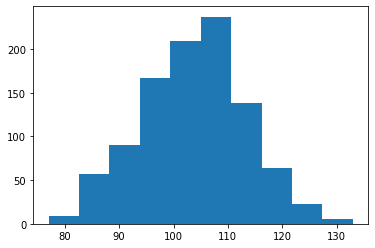

In [79]:
exitSamples = [DSE1().calc() for _ in range(1000)]
plt.hist(exitSamples) 

In [81]:
class DSE2():
    def __init__(self, stat_begin = 50, stat_end = 100):
        self.begin_time = 0
        self.end_time = stat_end
        self.stat_begin = stat_begin
        self.time = 0
        self.len = 4
        self.q_size = [5,6,6,3]
        self.h_size = [1,2,3,1]
        self.mu = [2.9, 2.2, 2.2, 2.8]
        self.server_heap = [0]*4
        for i in range(self.len):
            self.server_heap[i] = server_heap(self.h_size[i], self.q_size[i], self.mu[i], i)
        self.lam = 2.1
        self.ans = 0
        
    def add_work(self):
        works = Poisson(self.lam)
        # according to the problem
        for i in range(works):
            self.server_heap[0].add_task(self.time)
        # TODO: works will come at time:0, 1, 2, 3....
        
    def next_event(self):
        ans = (1e9,-1)
        for i in range(self.len):
            if (i == 3 or not self.server_heap[i+1].blocked()):
                ans = min(ans, (self.server_heap[i].que_min))
        # print("qwq",ans, self.time)
        if (floor(self.time) < floor(ans[0])):
            # print(floor(self.time), floor(ans[0]))
            self.time = floor(self.time)+1
            self.add_work()
        else:
            self.time=ans[0]
            self.server_heap[ans[1]].pop_min()
            if (ans[1]==3):
                if (self.time>=50 and self.time<100):
                    self.ans += 1
            else:
                self.server_heap[ans[1]+1].add_task(self.time)
        for i in range(self.len):self.server_heap[i].refresh(self.time)
    def calc(self):
        self.add_work()
        while (self.time<self.end_time):
            self.next_event()
        return self.ans

(array([  6.,  45., 118., 186., 179., 209., 168.,  73.,  13.,   3.]),
 array([ 70. ,  80.6,  91.2, 101.8, 112.4, 123. , 133.6, 144.2, 154.8,
        165.4, 176. ]),
 <BarContainer object of 10 artists>)

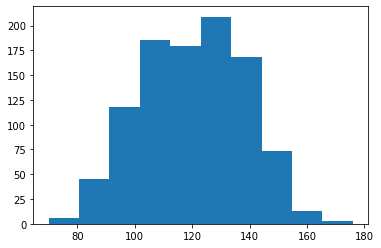

In [82]:
exitSamples = [DSE2().calc() for _ in range(1000)]
plt.hist(exitSamples) 